# Cognifyz Data Science Internship

### Import Libraries

In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from geopy.distance import great_circle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [385]:
df = pd.read_csv('resource/Dataset.csv')

In [386]:
df.sample(5).T

,2724,1394,8182,362,3265
Restaurant ID,18375413,18372311,18383484,17061296,18400744
Restaurant Name,Rama Desi Ghee Meat Wala,ZASTY,Baskin Robbins,Pom Pom's Teahouse and Sandwicheria,Number 31
Country Code,1,1,1,216,1
City,New Delhi,Gurgaon,Noida,Orlando,New Delhi
Address,"IA, Block 10 C, Ashok Vihar Phase 1, New Delhi","DLF Phase 3, Gurgaon","Food Court, 3rd Floor, Logix City Centre, Sect...","67 North Bumby Avenue, Orlando, FL 32803","31, Defence Colony Market, Defence Colony, New..."
Locality,Ashok Vihar Phase 1,DLF Phase 3,"Logix City Centre, Sector 32, Noida",The Milk District,Defence Colony
Locality Verbose,"Ashok Vihar Phase 1, New Delhi","DLF Phase 3, Gurgaon","Logix City Centre, Sector 32, Noida, Noida","The Milk District, Orlando","Defence Colony, New Delhi"
Longitude,0.0,77.094031,77.353663,-81.351467,77.230232
Latitude,0.0,28.492698,28.574309,28.543571,28.573554
Cuisines,North Indian,"Continental, North Indian, Asian",Ice Cream,"American, Sandwich, Tea","Continental, Asian, Sushi"


## **Level - I | Task - I**

### **Question :** Explore the dataset and identify the number of rows and columns.

In [387]:
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 9551
Number of columns: 21


##### **Answer :** There is total **9551 rows** and **21 columns** in this dataset.

### **Question :** Check for missing values in each column and handle them accordingly

In [388]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [389]:
df["Cuisines"] = df["Cuisines"].fillna("Others")

##### **Answer :** In column - **'Cuisines'** has **9** NULL values. But, other columns have no NULL values. Here, we fill NULL values by **'Others'**.

### **Question :** Perform data type conversion if necessary. Analyze the distribution of the target variable("Aggregate rating") and identify any class imbalances

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

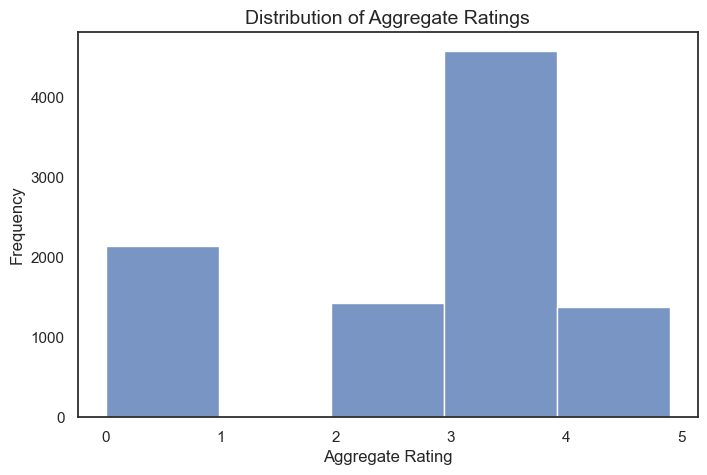

In [391]:
plt.figure(figsize=(8, 5))
sns.histplot(
    df["Aggregate rating"], 
    bins=5, 
    kde=False, 
    color=None, 
    palette="coolwarm"
)
plt.title("Distribution of Aggregate Ratings", fontsize=14)
plt.xlabel("Aggregate Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [392]:
rating_counts = df["Aggregate rating"].value_counts().sort_index()

print(rating_counts)

Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64


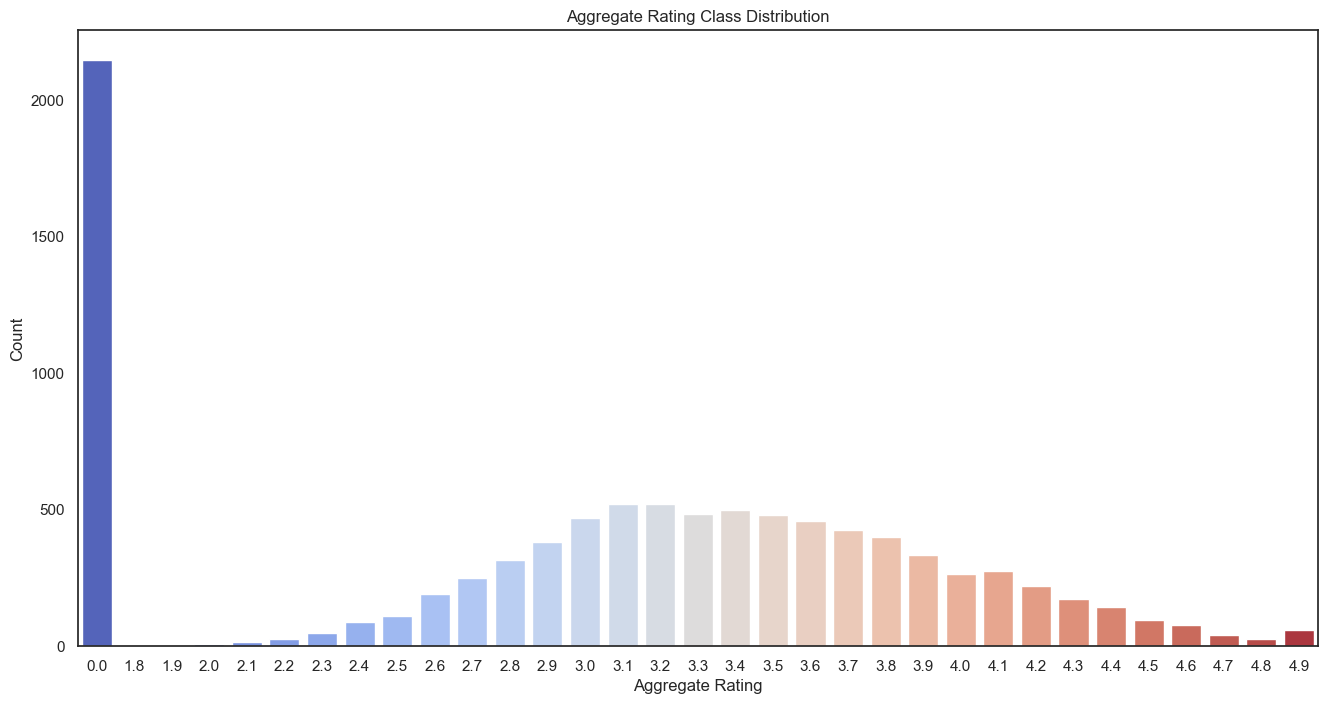

In [393]:
plt.figure(figsize=(16, 8))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="coolwarm")
plt.title("Aggregate Rating Class Distribution")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.show()

#### **Answer :** In this dataset, data types of each column is good fitted, there is no need of data conversion. There is a class imbalance with rating class **0.0**, count of which is much more than any other rating class.

## **Level - I | Task - II**

### **Question :** Calculate basic statistical measures (mean,median, standard deviation, etc.) for numerical columns

In [394]:
stats = df.describe(include=[float, int])

print("Descriptive Statistics:\n", stats)

Descriptive Statistics:
        Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.00

In [395]:
mean_rating = df["Aggregate rating"].mean()
median_votes = df["Votes"].median()
std_cost = df["Average Cost for two"].std()

print("\nAdditional Metrics:")
print(f"Mean Aggregate Rating: {mean_rating}")
print(f"Median Votes: {median_votes}")
print(f"Standard Deviation of Cost: {std_cost}")


Additional Metrics:
Mean Aggregate Rating: 2.66637001361114
Median Votes: 31.0
Standard Deviation of Cost: 16121.183073499644


### **Question :** Explore the distribution of categorical variables like "Country Code", "City" and "Cuisines".

In [396]:
country_dist = df["Country Code"].value_counts()
city_dist = df["City"].value_counts()
cuisines_dist = df["Cuisines"].value_counts()

print("Country Code Distribution:\n", country_dist)
print("\nCity Distribution:\n", city_dist)
print("\nCuisines Distribution:\n", cuisines_dist)

Country Code Distribution:
 Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

City Distribution:
 City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64

Cuisines Distribution:
 Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast

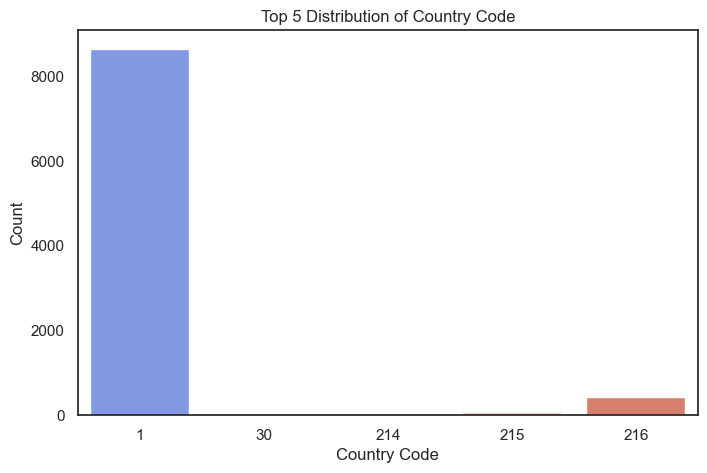

In [397]:
plt.figure(figsize=(8, 5))
sns.barplot(x=country_dist.head(5).index, y=country_dist.head(5).values, palette="coolwarm")
plt.title("Top 5 Distribution of Country Code")
plt.xlabel("Country Code")
plt.ylabel("Count")
plt.show()

##### **Answer :** Country code **1** has the most count among country code

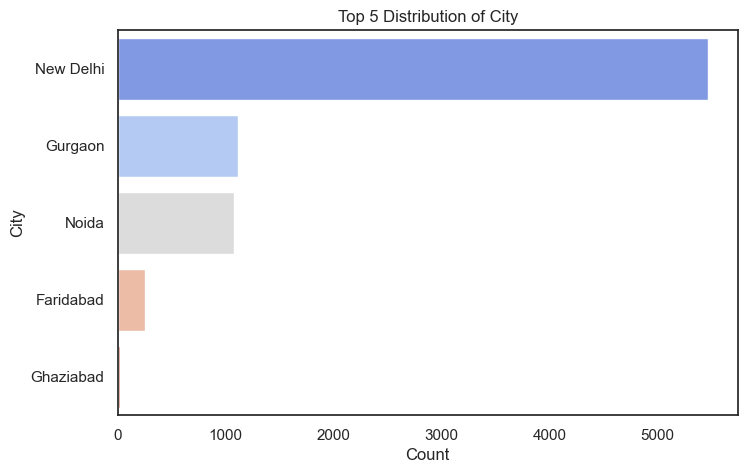

In [398]:
plt.figure(figsize=(8, 5))
sns.barplot(y=city_dist.head(5).index, x=city_dist.head(5).values, palette="coolwarm")
plt.title("Top 5 Distribution of City")
plt.xlabel("Count")
plt.ylabel("City")
plt.show()

##### **Answer :** City **New Delhi** has the most count among cities

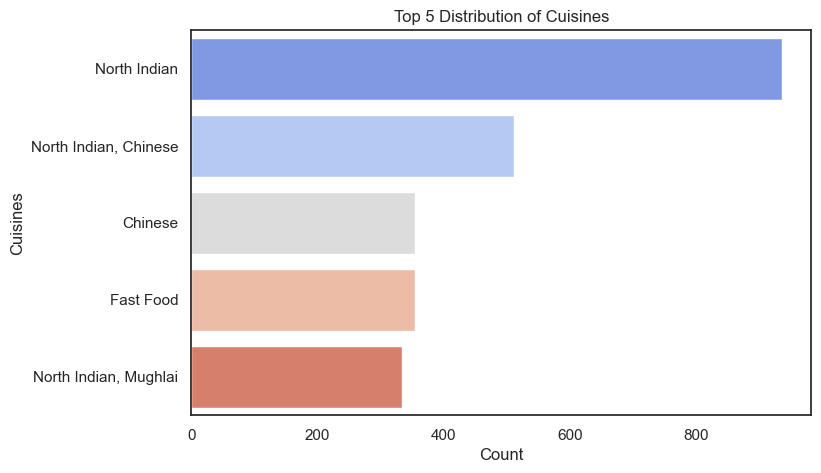

In [399]:
plt.figure(figsize=(8, 5))
sns.barplot(y=cuisines_dist.head(5).index, x=cuisines_dist.head(5).values, palette="coolwarm")
plt.title("Top 5 Distribution of Cuisines")
plt.xlabel("Count")
plt.ylabel("Cuisines")
plt.show()

##### **Answer :** **North Indian** cuisine has the most count among cuisines.

### **Question :** Identify the top cuisines and cities with the highest number of restaurants

In [400]:
top_cities = df["City"].value_counts().head(5)

cuisines_list = df["Cuisines"].str.split(", ").explode()
top_cuisines = cuisines_list.value_counts().head(5)

print("Top Cities with the Highest Number of Restaurants:\n", top_cities)
print("\nTop Cuisines with the Highest Number of Restaurants:\n", top_cuisines)

Top Cities with the Highest Number of Restaurants:
 City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

Top Cuisines with the Highest Number of Restaurants:
 Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Name: count, dtype: int64


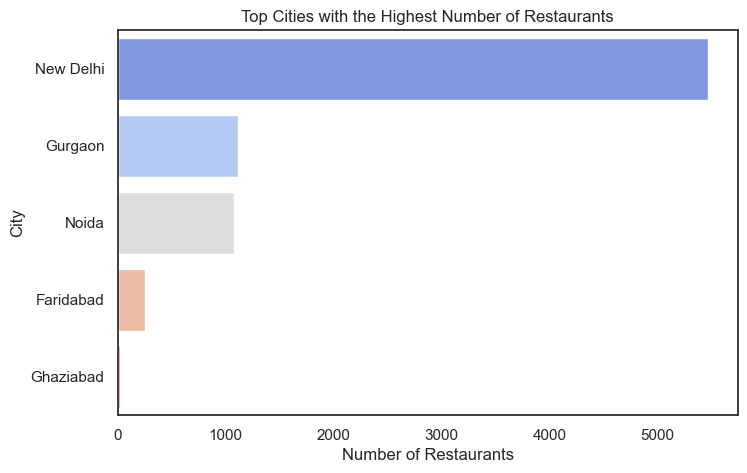

In [401]:
plt.figure(figsize=(8, 5))
sns.barplot(y=top_cities.index, x=top_cities.values, palette="coolwarm")
plt.title("Top Cities with the Highest Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

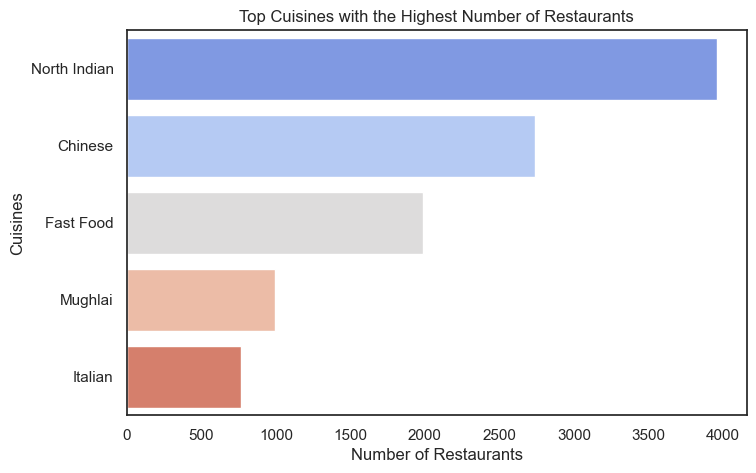

In [402]:
plt.figure(figsize=(8, 5))
sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette="coolwarm")
plt.title("Top Cuisines with the Highest Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisines")
plt.show()

##### **Answer :** Top city is **New Delhi** with the highest number of restaurants. In **2nd and 3rd** position, **Gurgaon and Noida** with highest number of restaurant. **North Indian, Chinese & Fast Food** are the top cuisines with the highest number of restaurants.

## **Level - I | Task - III**

### **Question :** Visualize the locations of restaurants on a map using latitude and longitude information

In [403]:
fig = px.scatter_map(df, lat="Latitude", lon="Longitude", color="Aggregate rating", size="Aggregate rating", 
                     color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=3, height=800)
fig.show()

### **Question :** Analyze the distribution of restaurants across different cities or countries

In [404]:
country_dist = df["Country Code"].value_counts()
city_dist = df["City"].value_counts()

print("Distribution of Restaurants by Country Code:\n", country_dist)
print("\nDistribution of Restaurants by City:\n", city_dist)

Distribution of Restaurants by Country Code:
 Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

Distribution of Restaurants by City:
 City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64


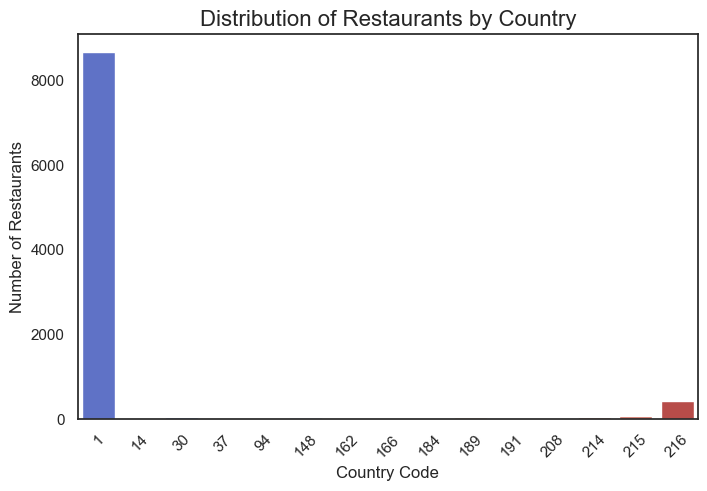

In [405]:
plt.figure(figsize=(8, 5))
sns.barplot(x=country_dist.index, y=country_dist.values, palette="coolwarm")
plt.title("Distribution of Restaurants by Country", fontsize=16)
plt.xlabel("Country Code", fontsize=12)
plt.ylabel("Number of Restaurants", fontsize=12)
plt.xticks(rotation=45)
plt.show()

##### **Answer :** Country Code 1 has the most number of restaurants.

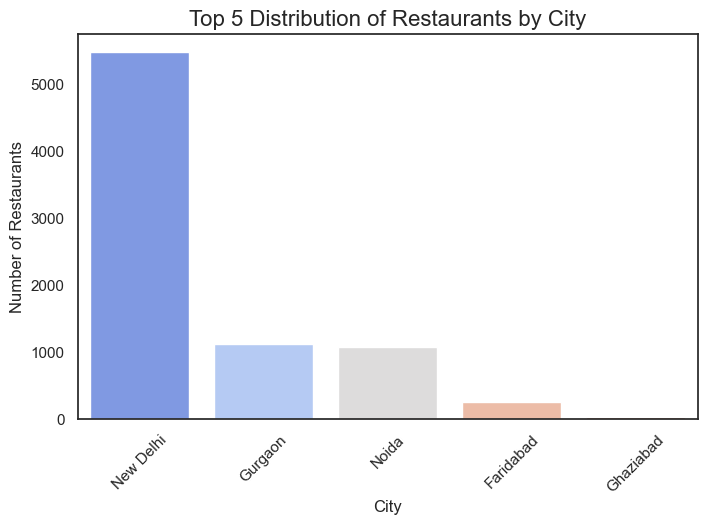

In [406]:
plt.figure(figsize=(8, 5))
sns.barplot(x=city_dist.head(5).index, y=city_dist.head(5).values, palette="coolwarm")
plt.title("Top 5 Distribution of Restaurants by City", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Restaurants", fontsize=12)
plt.xticks(rotation=45)
plt.show()

##### **Answer :** **New Delhi** has the most number of restaurant.

### **Question :** Determine if there is any correlation between the restaurant's location and its rating.

Correlation Matrix:
                   Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


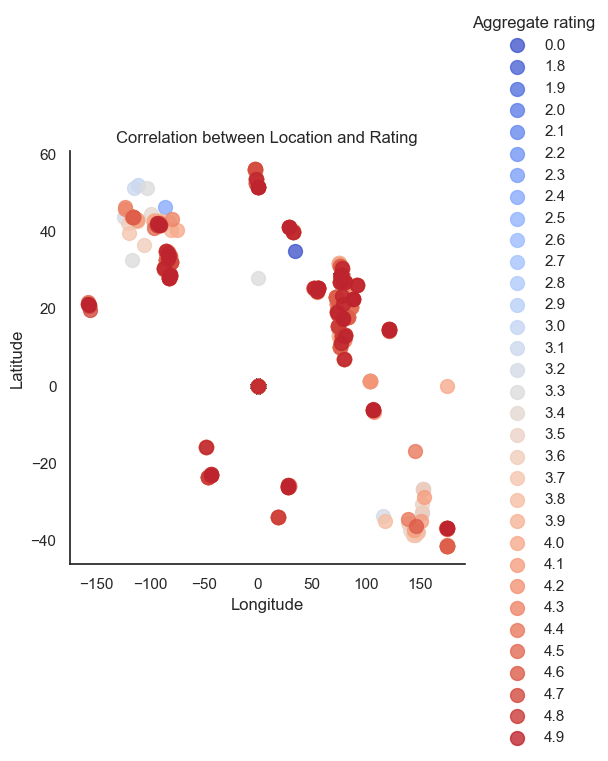

In [407]:
correlation = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()

print("Correlation Matrix:\n", correlation)

sns.lmplot(data=df, x='Longitude', y='Latitude', hue='Aggregate rating', fit_reg=False, markers='o', palette='coolwarm', scatter_kws={'s': 100})
plt.title('Correlation between Location and Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

##### **Answer :** In between **latitude 0 to 30** and **longitude 50 to 100**, location of restaurants got higher ratings than other locations.

## **Level - II | Task - I**

### **Question :** Determine the percentage of restaurants that offer table booking and online delivery.

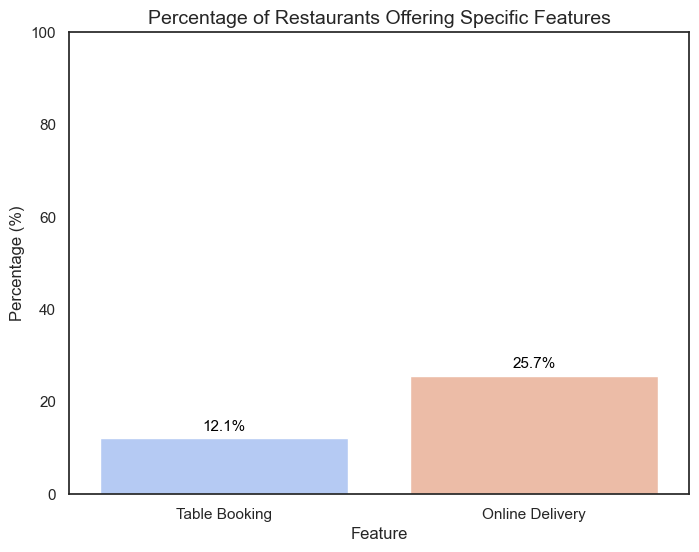

In [408]:
total_restaurants = len(df)
table_booking_count = df["Has Table booking"].value_counts()["Yes"]
online_delivery_count = df["Has Online delivery"].value_counts()["Yes"]

table_booking_percentage = (table_booking_count / total_restaurants) * 100
online_delivery_percentage = (online_delivery_count / total_restaurants) * 100

percentages = {
    "Feature": ["Table Booking", "Online Delivery"],
    "Percentage": [table_booking_percentage, online_delivery_percentage]
}
percentages_df = pd.DataFrame(percentages)

sns.set(style="white")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="Feature", y="Percentage", data=percentages_df, palette="coolwarm")

for i, bar in enumerate(ax.patches):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        f'{percentages_df["Percentage"][i]:.1f}%',
        ha='center', va='bottom', fontsize=11, color='black'
    )

plt.title("Percentage of Restaurants Offering Specific Features", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xlabel("Feature", fontsize=12)
plt.ylim(0, 100)
plt.show()

##### **Answer :** From the analysis, we found that, **12.1 %** restaurants provide **Table Booking** and **25.7 %** restaurants provide **Online Delivery**

### **Question :** Compare the average ratings of restaurants with table booking and those without.

In [409]:
average_ratings = df.groupby("Has Table booking")["Aggregate rating"].mean().reset_index()

average_ratings.columns = ["Has Table Booking", "Average Rating"]

print(average_ratings)

  Has Table Booking  Average Rating
0                No        2.559359
1               Yes        3.441969


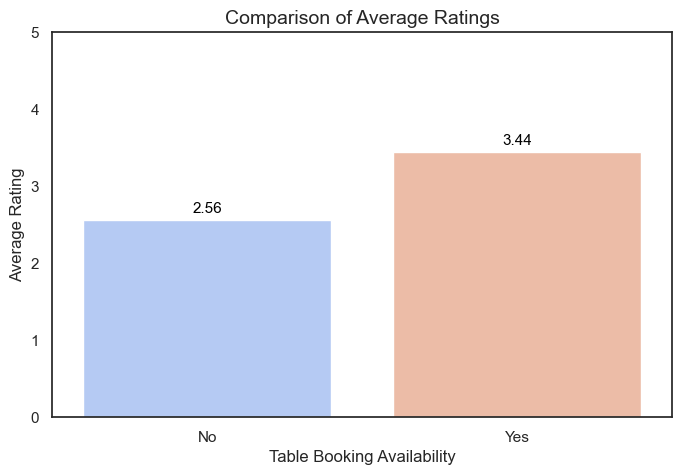

In [410]:
sns.set(style="white")
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Has Table Booking", y="Average Rating", data=average_ratings, palette="coolwarm")

for i, bar in enumerate(ax.patches):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.05,
        f'{bar.get_height():.2f}',
        ha='center', va='bottom', fontsize=11, color='black'
    )

plt.title("Comparison of Average Ratings", fontsize=14)
plt.ylabel("Average Rating", fontsize=12)
plt.xlabel("Table Booking Availability", fontsize=12)
plt.ylim(0, 5)
plt.show()

##### **Answer :** The average rating is 3.44 for **available** Table Booking & average rating is 2.56 for **not available** Table Booking.

### **Question :** Analyze the availability of online delivery among restaurants with different price ranges.

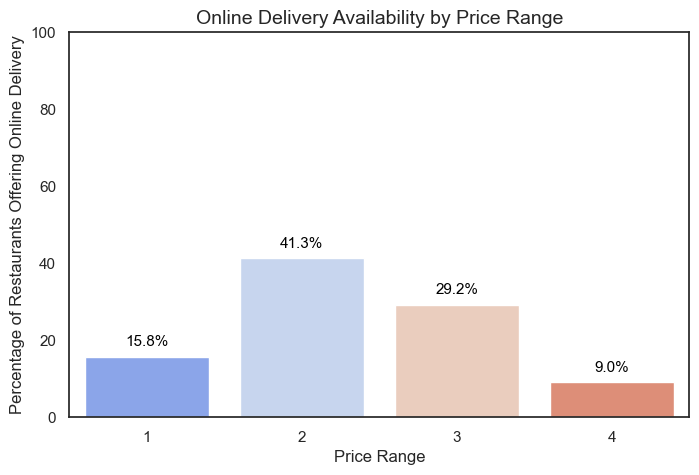

In [411]:
delivery_availability = df.groupby("Price range")["Has Online delivery"].apply(
    lambda x: (x == "Yes").mean() * 100
).reset_index()

delivery_availability.columns = ["Price Range", "Percentage Online Delivery"]

sns.set(style="white")
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x="Price Range", 
    y="Percentage Online Delivery", 
    data=delivery_availability, 
    palette="coolwarm"
)

for i, bar in enumerate(ax.patches):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 2,
        f'{bar.get_height():.1f}%',
        ha='center', va='bottom', fontsize=11, color='black'
    )

plt.title("Online Delivery Availability by Price Range", fontsize=14)
plt.xlabel("Price Range", fontsize=12)
plt.ylabel("Percentage of Restaurants Offering Online Delivery", fontsize=12)
plt.ylim(0, 100)
plt.show()

##### **Answer :** There are four price ranges : 1, 2, 3 and 4. Among them, **2 and 3** have the most Online Delivery Availability percentage, i.e. **41.3 % and 29.2 %** respectively.

## **Level - II | Task - II**

### **Question :** Determine the most common price range among all the restaurants

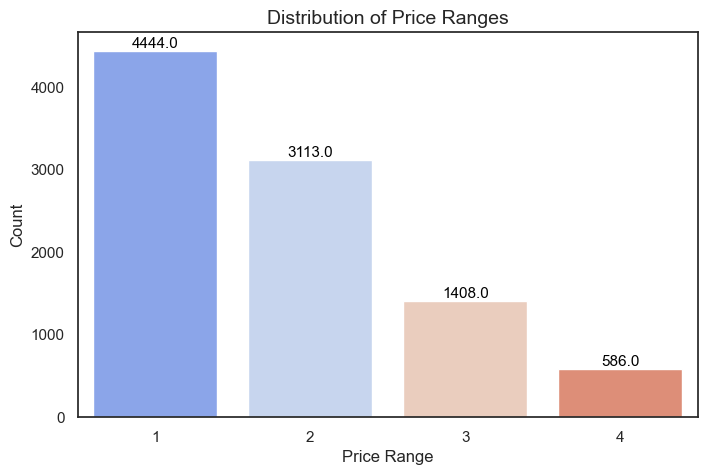

In [412]:
most_common_price_range = df["Price range"].mode()[0]

sns.set(style="white")
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="Price range", data=df, palette="coolwarm")

for i, bar in enumerate(ax.patches):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 2,
        f'{bar.get_height()}', 
        ha='center', va='bottom', fontsize=11, color='black'
    )

plt.title("Distribution of Price Ranges", fontsize=14)
plt.xlabel("Price Range", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

##### **Answer :** The **most common price range** among all restaurants is **1**.

### **Question :** Calculate the average rating for each price range

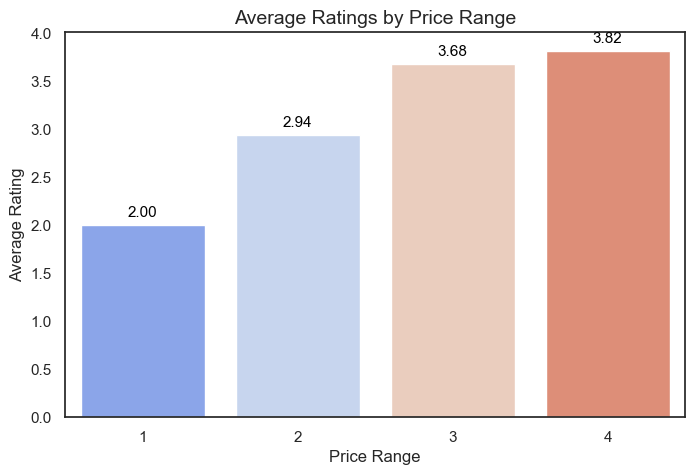

In [413]:
average_ratings_by_price = df.groupby('Price range')['Aggregate rating'].mean().reset_index()

sns.set(style="white")
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x="Price range", 
    y="Aggregate rating", 
    data=average_ratings_by_price, 
    palette="coolwarm"
)

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.05,
        f'{bar.get_height():.2f}',
        ha='center', va='bottom', fontsize=11, color='black'
    )

plt.title("Average Ratings by Price Range", fontsize=14)
plt.xlabel("Price Range", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.show()

##### **Answer :** Here is the average ratings of each price ranges. We can see the **price range 4** has the **highest average ratings**. Also, we can notice that, when price ranges getting high the average rating also getting higher.

### **Question :** Identify the color that represents the highest average rating among different price ranges.

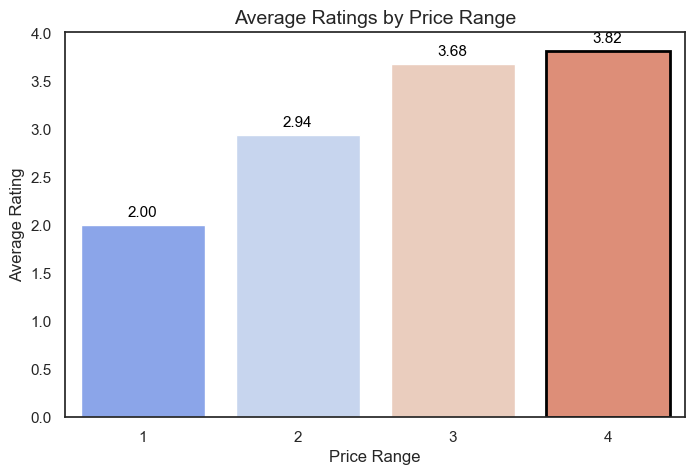

In [414]:
average_ratings_by_price = df.groupby('Price range')['Aggregate rating'].mean().reset_index()

highest_average_rating = average_ratings_by_price['Aggregate rating'].max()
most_common_price_range = average_ratings_by_price[average_ratings_by_price['Aggregate rating'] == highest_average_rating]['Price range'].values[0]

palette = sns.color_palette("coolwarm", as_cmap=True)
color = palette(most_common_price_range - 1)

sns.set(style="white")
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x="Price range", 
    y="Aggregate rating", 
    data=average_ratings_by_price, 
    palette="coolwarm"
)

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.05,
        f'{bar.get_height():.2f}',
        ha='center', va='bottom', fontsize=11, color='black'
    )

ax.patches[most_common_price_range - 1].set_edgecolor('black')
ax.patches[most_common_price_range - 1].set_linewidth(2)

plt.title("Average Ratings by Price Range", fontsize=14)
plt.xlabel("Price Range", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.show()

##### **Answer :** In above graph, **Black border** with **Orange bar** represents the highest average rating by price range, which is 4

## **Level - II | Task - III**

### **Question :** Extract additional features from the existing columns, such as the length of the restaurant name or address

In [415]:
new_df = df[['Restaurant Name', 'Address']].copy()
new_df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)
new_df['Address Length'] = df['Address'].apply(len)


print(new_df[['Restaurant Name', 'Restaurant Name Length', 'Address', 'Address Length']].sample(10))

                Restaurant Name  Restaurant Name Length  \
7608                Today Pizza                      11   
8186               Dolce Gelato                      12   
7809           FM Biryani Point                      16   
7141          Bitoo Chat Corner                      17   
8448                Metro Dhaba                      11   
7384  P2 Tandoori Momos Station                      25   
4652                Latitude 28                      11   
7939              Pudding & Pie                      13   
4144               Just Parkash                      12   
7102                     Empire                       6   

                                                Address  Address Length  
7608  E-1, Khyala Road, Vishnu Garden, Tilak Nagar, ...              55  
8186  2nd Floor, Logix City Center Mall, Sector 32, ...              67  
7809  D-78, Opposite Akbari Masjid, New Ashok Nagar,...              76  
7141  A1/1, GSK Complex, Bhairon Baba Market, Shahda..

### **Question :** Create new features like "Has Table Booking"or "Has Online Delivery" by encoding categorical variables.

In [416]:
df['Has Table Booking (Encoded)'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Online Delivery (Encoded)'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

df.drop(['Has Table booking', 'Has Online delivery'], axis=1, inplace=True)

df.sample(5).T

,930,3858,3619,195,4147
Restaurant ID,18383469,18455513,308994,17330735,18366025
Restaurant Name,Al Bake,Singh Chicken,Nagpal Di Hatti,Samurai Japanese Cuisine & Sushi Bar,Mr. Momo
Country Code,1,1,1,216,1
City,Faridabad,New Delhi,New Delhi,Columbus,New Delhi
Address,"SCF 58, Ground Floor, Sector 15, Faridabad","Shop 1, Plot 7 & 8, Vishal Market, West Mukher...","131, Budhh Bazar, Veer Savarkar Market, Gandhi...","1009 Broadway, Columbus, GA 31901","Shop 41/1, Near House of Tax, Ashok Nagar, Jai..."
Locality,Sector 15,GTB Nagar,Geeta Colony,Columbus,Jail Road
Locality Verbose,"Sector 15, Faridabad","GTB Nagar, New Delhi","Geeta Colony, New Delhi","Columbus, Columbus","Jail Road, New Delhi"
Longitude,77.32293,77.20277,0.0,-84.993363,77.099683
Latitude,28.395009,28.707563,0.0,32.465242,28.63575
Cuisines,"North Indian, Chinese","North Indian, Mughlai","North Indian, Street Food","Japanese, Steak, Sushi","Fast Food, Chinese"


## **Level - III | Task - I**

### **Question :** Build a regression model to predict the aggregate rating of a restaurant based on available features. Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics. Experiment with different algorithms (e.g.,linear regression, decision trees, randomforest) and compare their performance.

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Restaurant ID                  9551 non-null   int64  
 1   Restaurant Name                9551 non-null   object 
 2   Country Code                   9551 non-null   int64  
 3   City                           9551 non-null   object 
 4   Address                        9551 non-null   object 
 5   Locality                       9551 non-null   object 
 6   Locality Verbose               9551 non-null   object 
 7   Longitude                      9551 non-null   float64
 8   Latitude                       9551 non-null   float64
 9   Cuisines                       9551 non-null   object 
 10  Average Cost for two           9551 non-null   int64  
 11  Currency                       9551 non-null   object 
 12  Is delivering now              9551 non-null   o

In [418]:
ml_df = df.copy()
ml_df.drop(columns=['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose', 
                 'Currency', 'Cuisines', 'Is delivering now', 'Switch to order menu'], inplace=True)

In [419]:
ml_df.head()

,Country Code,City,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Rating color,Rating text,Votes,Has Table Booking (Encoded),Has Online Delivery (Encoded)
0,162,Makati City,121.027535,14.565443,1100,3,4.8,Dark Green,Excellent,314,1,0
1,162,Makati City,121.014101,14.553708,1200,3,4.5,Dark Green,Excellent,591,1,0
2,162,Mandaluyong City,121.056831,14.581404,4000,4,4.4,Green,Very Good,270,1,0
3,162,Mandaluyong City,121.056475,14.585318,1500,4,4.9,Dark Green,Excellent,365,0,0
4,162,Mandaluyong City,121.057508,14.584450,1500,4,4.8,Dark Green,Excellent,229,1,0


In [420]:
categorical_columns = ['City', 'Rating color', 'Rating text']
ml_df = pd.get_dummies(ml_df, columns=categorical_columns, drop_first=True)
ml_df.head()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Has Table Booking (Encoded),Has Online Delivery (Encoded),City_Agra,...,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
0,162,121.027535,14.565443,1100,3,4.8,314,1,0,False,...,False,False,False,False,False,True,False,False,False,False
1,162,121.014101,14.553708,1200,3,4.5,591,1,0,False,...,False,False,False,False,False,True,False,False,False,False
2,162,121.056831,14.581404,4000,4,4.4,270,1,0,False,...,True,False,False,False,False,False,False,False,False,True
3,162,121.056475,14.585318,1500,4,4.9,365,0,0,False,...,False,False,False,False,False,True,False,False,False,False
4,162,121.057508,14.584450,1500,4,4.8,229,1,0,False,...,False,False,False,False,False,True,False,False,False,False


In [421]:
X = ml_df.drop('Aggregate rating', axis=1)
y = ml_df['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [422]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [423]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None)
}

metrics = {'MAE': [], 'MSE': [], 'RMSE': [], 'R2': []}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    metrics['MAE'].append(mae)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['R2'].append(r2)
    
    print(f"{model_name} Metrics:")
    print(f"  MAE: {mae}")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  R^2: {r2}")
    print("-" * 40)

Linear Regression Metrics:
  MAE: 8117742404.676875
  MSE: 1.4963223866905486e+22
  RMSE: 122324257066.64024
  R^2: -6.57403662593105e+21
----------------------------------------
Decision Tree Regressor Metrics:
  MAE: 0.156305599162742
  MSE: 0.06047619047619046
  RMSE: 0.24591907302238772
  R^2: 0.973430011157784
----------------------------------------
Random Forest Regressor Metrics:
  MAE: 0.11943252597742379
  MSE: 0.031007677046529705
  RMSE: 0.17608996861414253
  R^2: 0.9863768926802079
----------------------------------------


### **Model Performance Analysis:**
### **Linear Regression:**

#### **MAE (Mean Absolute Error):** Large value (8117742404.68) indicates the average magnitude of error per prediction is very high. This suggests that Linear Regression is not capturing the complexity of the data well.

#### **MSE (Mean Squared Error):** Very large value (1.4963223866905486e+22) implies the errors are highly large and scattered. It reflects poor model fit.

#### **RMSE (Root Mean Squared Error):** Extremely large (122324257066.64) indicating high deviation in predicted values from the actual.

#### **R² Score:** Negative (-6.57e+21) suggests that the model explains almost none of the variance in the target variable, meaning it is performing poorly.

### **Decision Tree Regressor:**

#### **MAE:** Low (0.156) indicates that Decision Tree captures patterns well and produces smaller errors.

#### **MSE:** Low (0.060) shows that the model’s predictions are fairly close to the actual values.

#### **RMSE:** Low (0.246) indicating good accuracy in predictions.

#### **R² Score:** High (0.973), showing that the model captures most of the variance and provides an excellent fit to the data.

### **Random Forest Regressor:**

#### **MAE:** Low (0.119) indicates minimal error in predictions.

#### **MSE:** Low (0.031) shows that predictions are very close to the actual values.

#### **RMSE:** Low (0.176) indicating high accuracy in prediction.

#### **R² Score:** High (0.986) shows that Random Forest is capturing almost all the variance, providing an excellent fit.

### **Conclusion:**
### **Decision Tree Regressor:** While useful for capturing non-linear relationships, it tends to overfit the data when there are many categorical variables.

### **Random Forest Regressor:** The best performer in this case. It effectively handles non-linear relationships, works well with feature interactions, and avoids overfitting by using ensemble methods.

### **Linear Regression:** Clearly not suitable due to its poor performance and inability to capture complex patterns in the data.

### **Random Forest Regressor is the recommended model based on these results.**

## **Level - III | Task - II**

### **Question :** Analyze the relationship between the type of cuisine and the restaurant's rating

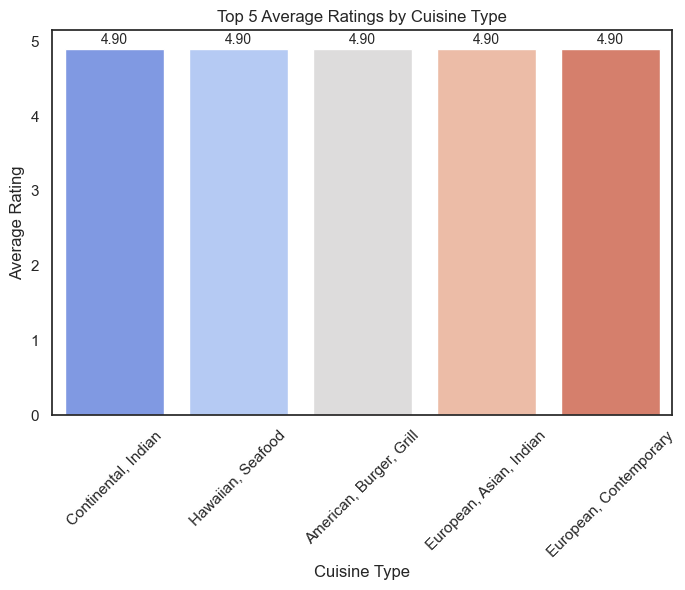

In [424]:
cuisine_avg_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=cuisine_avg_rating.head(5).index, y=cuisine_avg_rating.head(5).values, palette="coolwarm")

for i, rating in enumerate(cuisine_avg_rating.head(5).values):
    plt.text(i, rating + 0.02, f"{rating:.2f}", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.title('Top 5 Average Ratings by Cuisine Type')
plt.ylabel('Average Rating')
plt.xlabel('Cuisine Type')
plt.show()

### **Question :** Identify the most popular cuisines among customers based on the number of votes

In [425]:
cuisine_total_votes = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

cuisine_total_votes.head(10)

Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64

##### **Answer :** **North Indian, Mughlai** is the most popular cuisines based on the votes

### **Question :** Determine if there are any specific cuisines that tend to receive higher ratings

In [426]:
cuisine_avg_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

cuisine_avg_rating.head(20)

Cuisines
Continental, Indian                4.90
Hawaiian, Seafood                  4.90
American, Burger, Grill            4.90
European, Asian, Indian            4.90
European, Contemporary             4.90
American, Coffee and Tea           4.90
American, Sandwich, Tea            4.90
European, German                   4.90
Mexican, American, Healthy Food    4.90
Burger, Bar Food, Steak            4.90
American, BBQ, Sandwich            4.90
Italian, Bakery, Continental       4.90
BBQ, Breakfast, Southern           4.90
Sunda, Indonesian                  4.90
Mughlai, Lucknowi                  4.90
American, Caribbean, Seafood       4.90
Italian, Deli                      4.90
World Cuisine                      4.90
Filipino, Mexican                  4.85
French, Japanese, Desserts         4.80
Name: Aggregate rating, dtype: float64

##### **Answer :** In the above we have shown top 10 cuisines which have tend to receive higher ratings

## **Level - III | Task - III**

### **Question :** Create visualizations to represent the distribution of ratings using different charts (histogram, barplot, etc.).

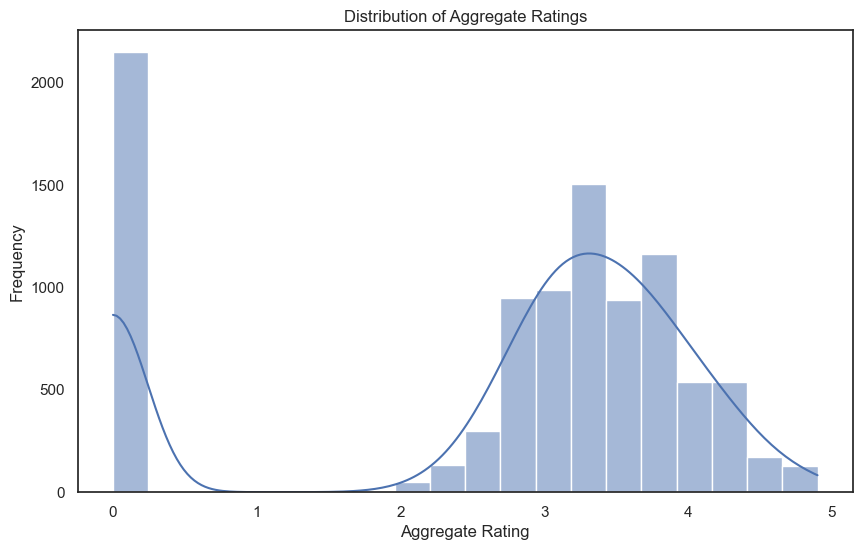

In [427]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, palette='coolwarm')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

### **Question :** Compare the average ratings of different cuisines or cities using appropriate visualizations

In [428]:
cuisine_avg_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

city_avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

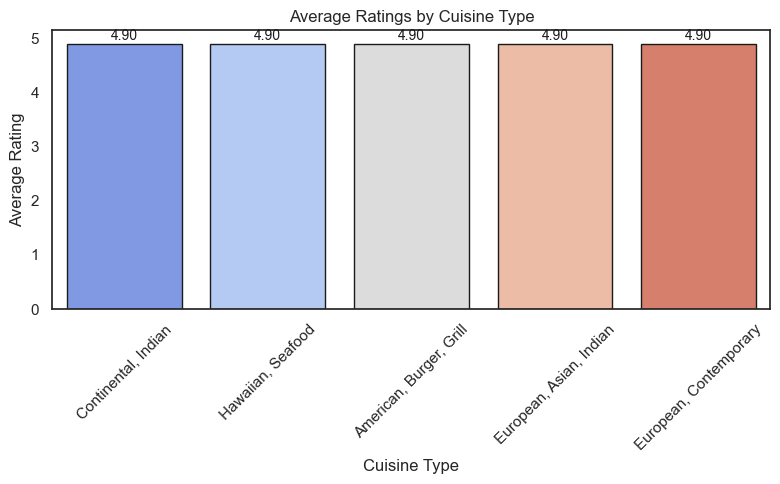

In [429]:
plt.figure(figsize=(8, 5))
sns.barplot(x=cuisine_avg_rating.head(5).index, y=cuisine_avg_rating.head(5).values, palette="coolwarm", edgecolor='k')
plt.xticks(rotation=45)
plt.title('Average Ratings by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')

for i, rating in enumerate(cuisine_avg_rating.head(5).values):
    plt.text(i, rating + 0.02, f"{rating:.2f}", ha='center', va='bottom', fontsize=10, color='k')

plt.tight_layout()
plt.show()

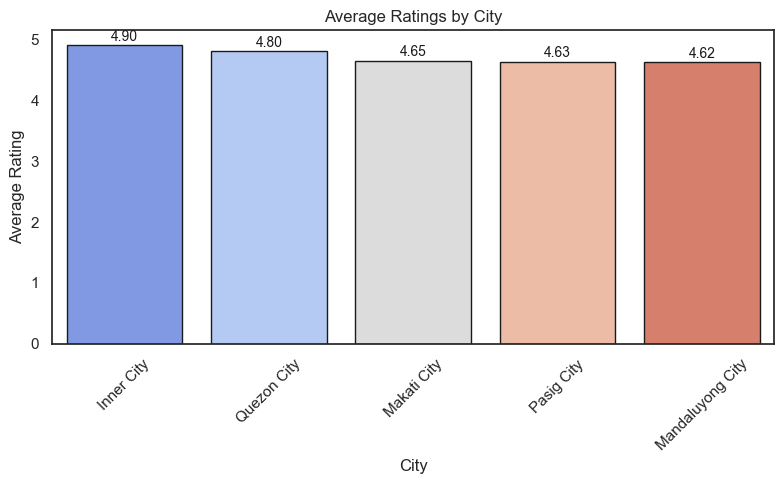

In [430]:
plt.figure(figsize=(8, 5))
sns.barplot(x=city_avg_rating.head(5).index, y=city_avg_rating.head(5).values, palette="coolwarm", edgecolor='k')
plt.xticks(rotation=45)
plt.title('Average Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Rating')


# Adding data labels
for i, rating in enumerate(city_avg_rating.head(5).values):
    plt.text(i, rating + 0.02, f"{rating:.2f}", ha='center', va='bottom', fontsize=10, color='k')

plt.tight_layout()
plt.show()

### **Question :** Visualize the relationship between various features and the target variable to gain insights

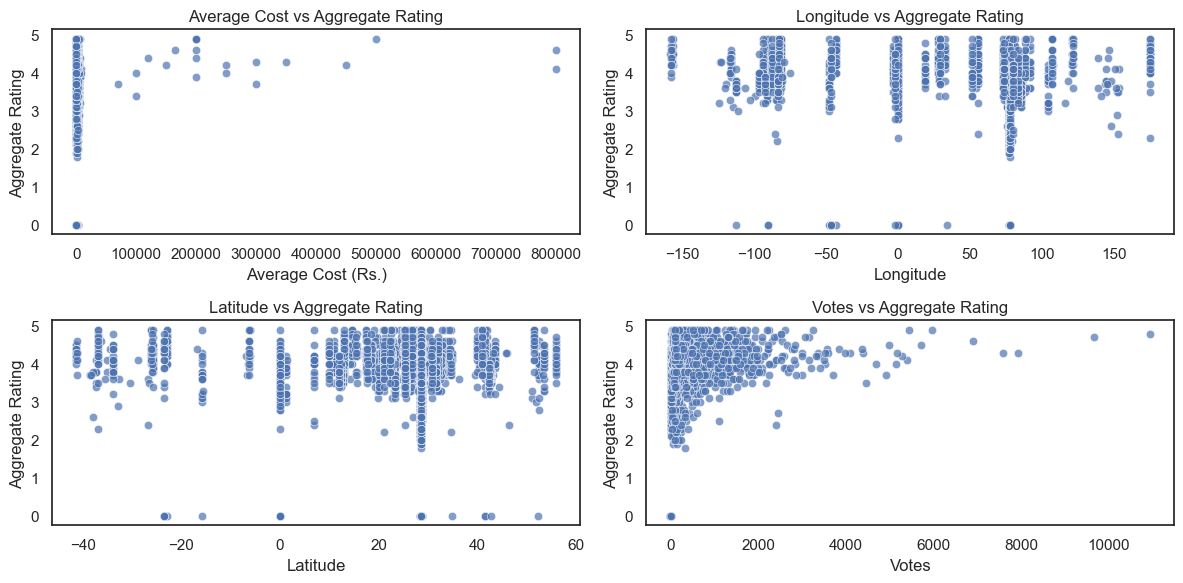

In [431]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df, alpha=0.7)
plt.title('Average Cost vs Aggregate Rating')
plt.xlabel('Average Cost (Rs.)')
plt.ylabel('Aggregate Rating')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Longitude', y='Aggregate rating', data=df, alpha=0.7)
plt.title('Longitude vs Aggregate Rating')
plt.xlabel('Longitude')
plt.ylabel('Aggregate Rating')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Latitude', y='Aggregate rating', data=df, alpha=0.7)
plt.title('Latitude vs Aggregate Rating')
plt.xlabel('Latitude')
plt.ylabel('Aggregate Rating')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, alpha=0.7)
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')

plt.tight_layout()
plt.show()

## ---------------------------------THANK YOU ------------------------------------